In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_pump_features = pd.read_csv("Features/df_pump_feature.csv")
df_pump_features.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.618911,0.925681,0.701981,0.091545,0.000002,0.098950,0.005493,0.012644,-386.528107,37.655472,...,0.034739,0.019129,0.004408,0.032758,0.011596,0.005974,0.060059,0.161621,0.108990,0.022118
1,0.632334,0.917475,0.706624,0.080697,0.000002,0.115247,0.006129,0.014434,-377.063965,39.815189,...,0.037490,0.017131,0.004587,0.028863,0.012557,0.005200,0.059570,0.158203,0.102736,0.018069
2,0.583019,0.959289,0.701976,0.092269,0.000003,0.087054,0.004755,0.010229,-368.240814,56.739162,...,0.033884,0.013366,0.004697,0.022797,0.011093,0.003734,0.048340,0.164551,0.109183,0.020230
3,0.616402,0.913490,0.713294,0.080915,0.000003,0.087497,0.005260,0.011403,-372.939240,48.631321,...,0.034416,0.017787,0.004637,0.037976,0.011337,0.005408,0.070312,0.188477,0.113540,0.024434
4,0.574071,0.934364,0.708863,0.083534,0.000003,0.105881,0.005934,0.013229,-361.572174,56.024799,...,0.037830,0.014975,0.004840,0.026781,0.012485,0.004465,0.064453,0.171387,0.105512,0.021831


In [3]:
df_pump_target = pd.read_csv("Features/df_pump_target.csv")
df_pump_target.tail()

,0
12610,1
12611,1
12612,1
12613,1
12614,1


In [4]:
X = df_pump_features
y = df_pump_target.values.ravel()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)

In [6]:
from sklearn.ensemble import RandomForestClassifier
####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 94.77%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 94.53%


In [7]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.50      0.67       275
           1       0.94      1.00      0.97      2248

    accuracy                           0.95      2523
   macro avg       0.97      0.75      0.82      2523
weighted avg       0.95      0.95      0.94      2523



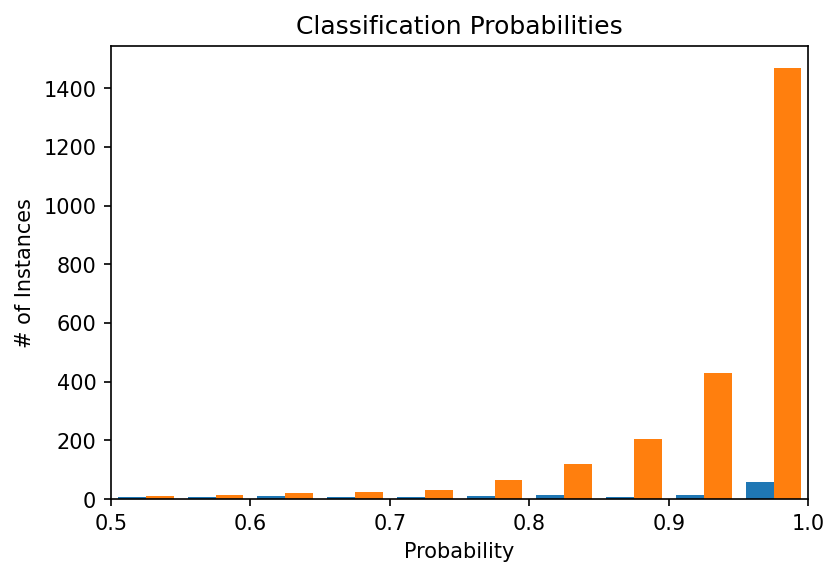

In [8]:
# predict probabilities
probas = model.predict_proba(X_test)

# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()

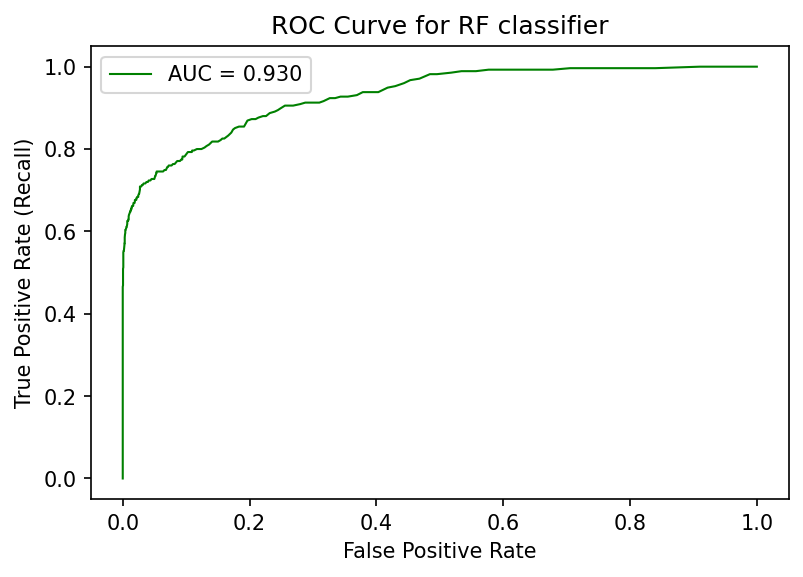

In [9]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

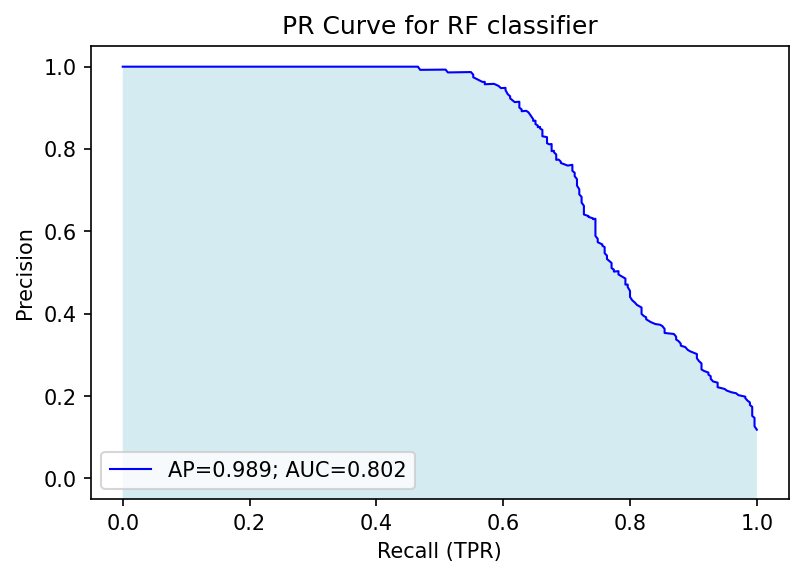

In [10]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()